## Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

## Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
import re # Regular Expression
import string
import nltk # Natural Language Processing Toolkit
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
from google.colab import files
upload=files.upload()

Saving Twitter Sentiments.csv to Twitter Sentiments (1).csv


In [4]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing the dataset

In [6]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [7]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [9]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [56]:
def cleanUpTweet(txt):
  txt= re.sub(r'@[A-Za-z0-9]+', '',txt)
  txt= re.sub(r'#', '',txt)
  txt= re.sub(r'RT : ', '',txt)
  return txt

In [11]:
# remove short words of length less than 3 characters
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [13]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [14]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


## Exploratory Data Analysis (EDA)




In [15]:
# !pip install wordcloud

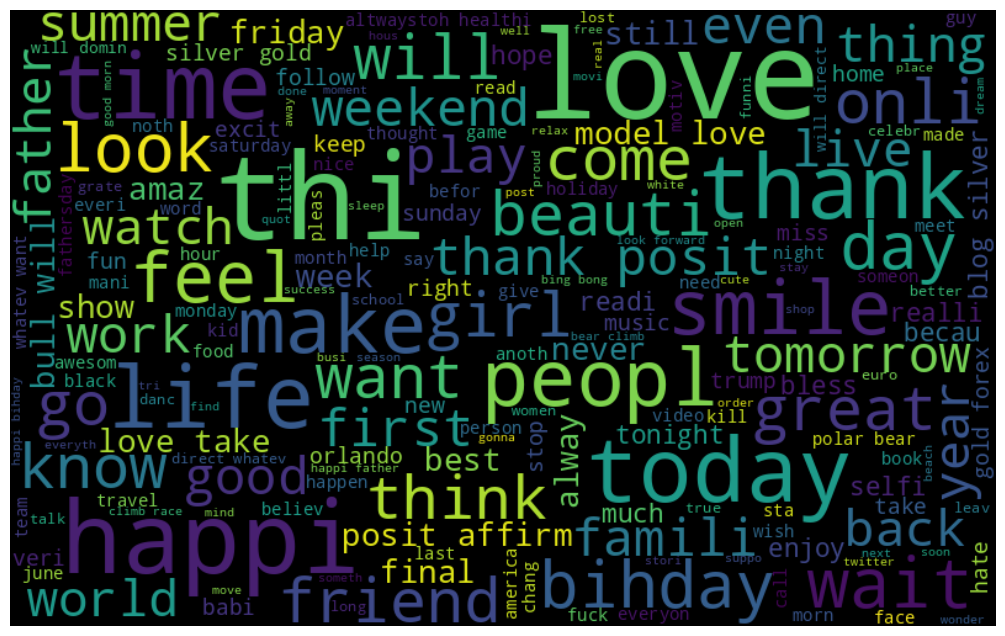

In [16]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

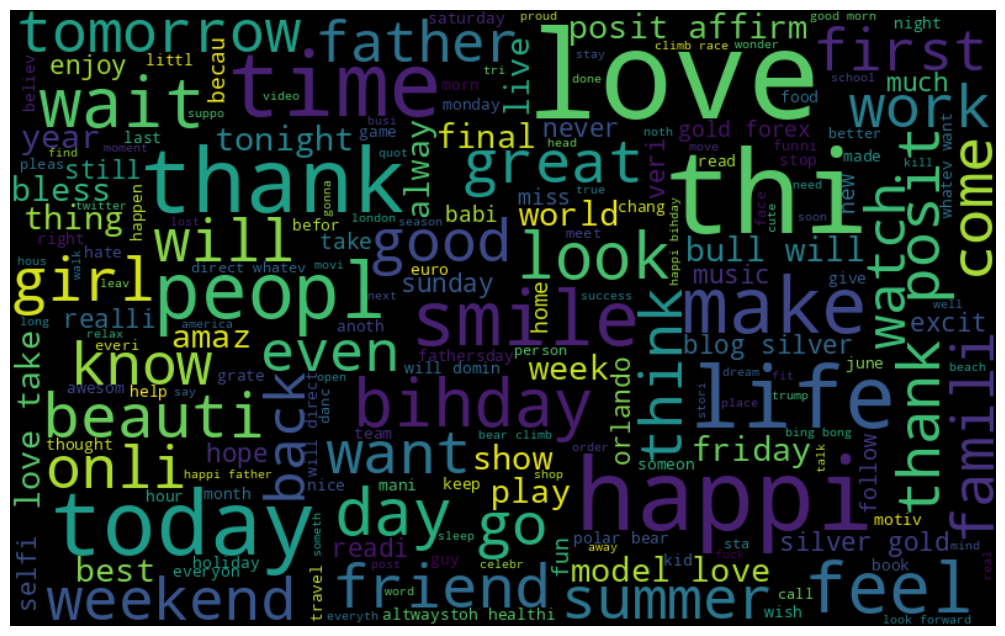

In [17]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

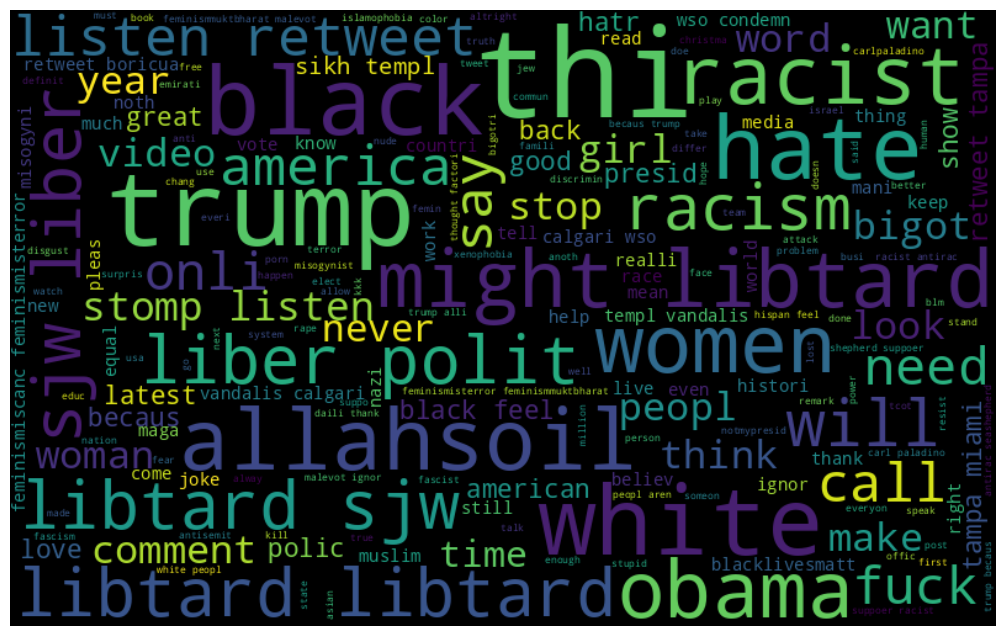

In [18]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [20]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [21]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [22]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [23]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [24]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


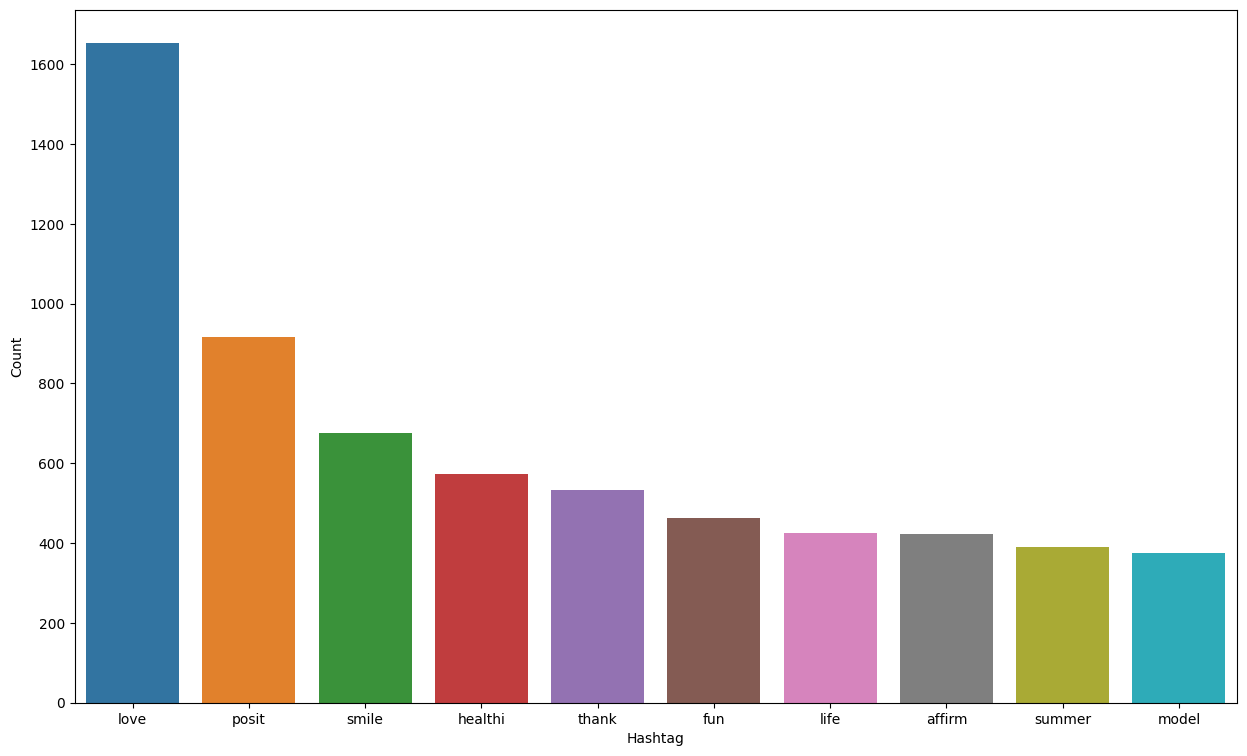

In [25]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [26]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


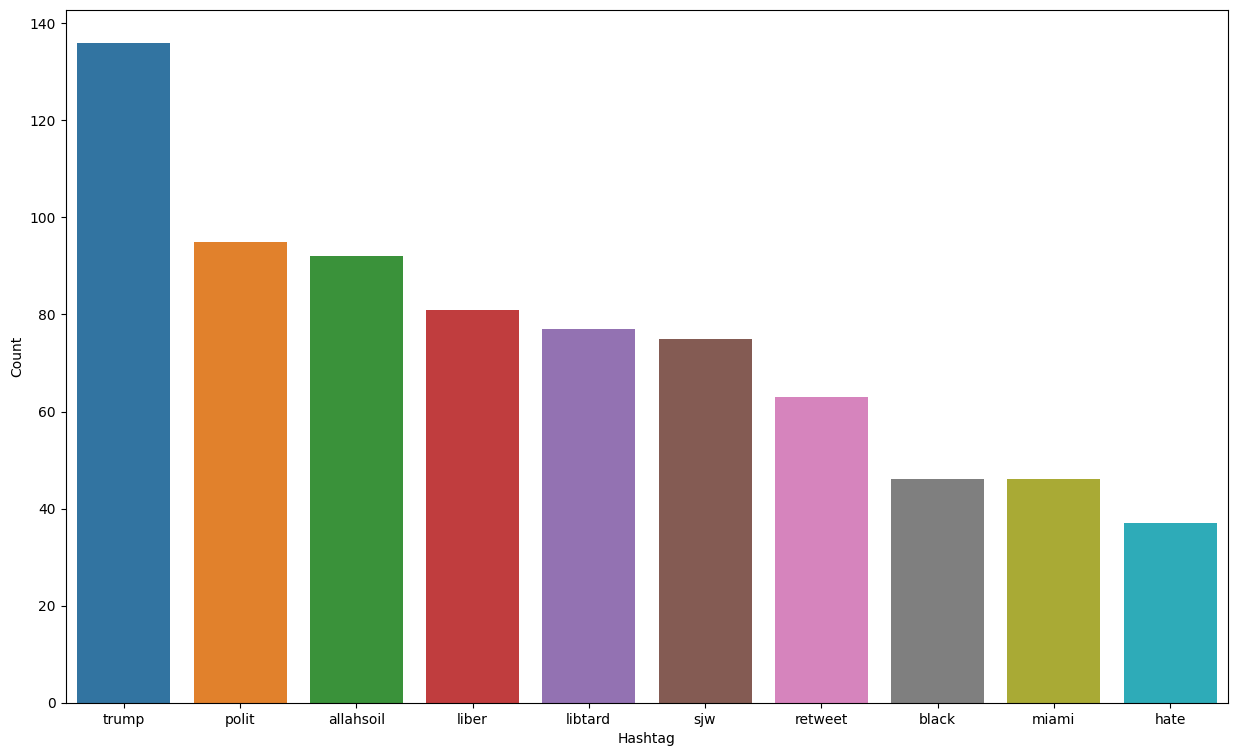

In [27]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Input Split

In [28]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [29]:
# bow[0].toarray()

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

## Model Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [32]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [34]:
accuracy_score(y_test,pred)

0.9469403078463271

In [57]:
def getTextSubjectivity(txt):
  return  TextBlob(txt).sentiment.subjectivity

In [58]:
def getTextPolarity(txt):
  return  TextBlob(txt).sentiment.polarity

In [59]:
df['Subjectivity']=df['clean_tweet'].apply(getTextSubjectivity)
df['Polarity']=df['clean_tweet'].apply(getTextPolarity)
df.head(30)

,id,label,tweet,clean_tweet,Tweet,Subjectivity,Polarity,Score
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...,when a father is dysfunctional and is so sel...,0.535417,-0.300000,Negative
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...,thanks for lyft credit i can't use cause the...,0.000000,0.000000,Neutral
2,3,0,bihday your majesty,bihday your majesti,bihday your majesty,0.000000,0.000000,Neutral
3,4,0,#model i love u take with u all the time in ...,#model love take with time,model i love u take with u all the time in u...,0.600000,0.500000,Positive
4,5,0,factsguide: society now #motivation,factsguid societi #motiv,factsguide: society now motivation,0.000000,0.000000,Neutral
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...,[2/2] huge fan fare and big talking before the...,0.900000,0.400000,Positive
6,7,0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni,camping tomorrow dannyâ¦,0.000000,0.000000,Neutral
7,8,0,the next school year is the year for exams.ð...,next school year year exam think about that #s...,the next school year is the year for exams.ð...,0.450000,-0.400000,Negative
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...,we won!!! love the land!!! allin cavs champion...,0.600000,0.500000,Positive
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcom here,welcome here ! i'm it's so gr8 !,0.000000,0.000000,Neutral


In [43]:
def getTextAnalysis(a):
  if a<0:
    return "Negative"
  elif a==0:
    return "Neutral"
  else:
    return "Positive"

In [44]:
df["Score"]=df['Polarity'].apply(getTextAnalysis)
df.head(30)

,id,label,tweet,clean_tweet,Tweet,Subjectivity,Polarity,Score
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...,when a father is dysfunctional and is so sel...,0.535417,-0.300000,Negative
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...,thanks for lyft credit i can't use cause the...,0.000000,0.000000,Neutral
2,3,0,bihday your majesty,bihday your majesti,bihday your majesty,0.000000,0.000000,Neutral
3,4,0,#model i love u take with u all the time in ...,#model love take with time,model i love u take with u all the time in u...,0.600000,0.500000,Positive
4,5,0,factsguide: society now #motivation,factsguid societi #motiv,factsguide: society now motivation,0.000000,0.000000,Neutral
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...,[2/2] huge fan fare and big talking before the...,0.900000,0.400000,Positive
6,7,0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni,camping tomorrow dannyâ¦,0.000000,0.000000,Neutral
7,8,0,the next school year is the year for exams.ð...,next school year year exam think about that #s...,the next school year is the year for exams.ð...,0.450000,-0.400000,Negative
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...,we won!!! love the land!!! allin cavs champion...,0.600000,0.500000,Positive
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcom here,welcome here ! i'm it's so gr8 !,0.000000,0.000000,Neutral


In [45]:
positive=df[df['Score']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+'% of positive tweets')
pos=positive.shape[0]/df.shape[0]*100

35.32319629560103% of positive tweets


In [46]:
negative=df[df['Score']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+'% of negative tweets')
neg=negative.shape[0]/df.shape[0]*100

11.501157624679307% of negative tweets


In [47]:
neutral=df[df['Score']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+'% of neutral tweets')
neutrall=neutral.shape[0]/df.shape[0]*100

53.17564607971966% of neutral tweets


In [35]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5545722713864307

In [36]:
accuracy_score(y_test,pred)

0.9433112251282693

In [55]:
pred_prob[0][1] >= 0.3

False

In [48]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neutrall]
colors=['yellowgreen','lightcoral','gold']

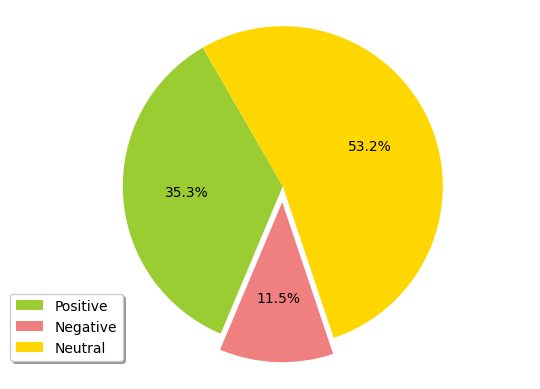

In [49]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Twitter_Sentiment_Analysis.png")

<BarContainer object of 3 artists>

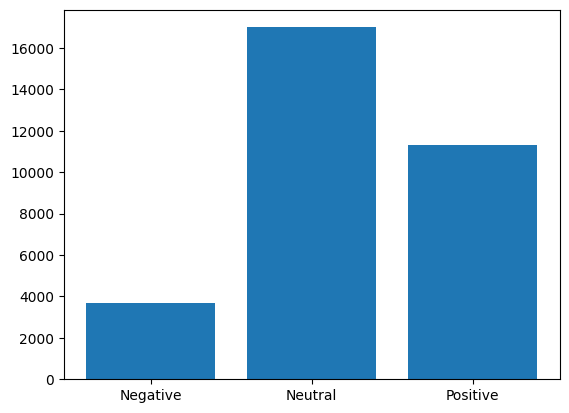

In [50]:
labels=df.groupby('Score').count().index.values
values=df.groupby('Score').size().values
plt.bar(labels,values)